# Topography

The topography tool helps managing GIS data which describes elevation lines.
As pf today, the tool supports data in geopandas dataframe format.

When initializing the tool, one should deliver the project name.
Other available parameters are: 

<ul>
<li>FilesDirectory: The path in which to save new files. Note that the path must be a full path.
    If this parameter is not specified, new files are saved at the current working directory.</li>
<li>databaseNameList: See projectMultiDB documentation.</li>
<li>useAll: See projectMultiDB documentation.</li>
<li>publicProjectName: The project name at the public database, the default name is "Topography".</li>
<li>Source: The source of the data, which is defined at the config document. The defaul
    source is "BNTL", which corresponds to the data which is loaded when initializing hera-data.</li>
</ul>

In [1]:
from hera.measurements.GIS.locations.topography import datalayer as topoDatalayer
topography = topoDatalayer(projectName="Documentation", FilesDirectory="/home/ofir/Development/pyhera/hera/doc/source/measurements/GIS/locations/examples", 
                           databaseNameList=None, useAll=False,publicProjectName="Topography",Source="BNTL")

The default config document of the tool is:

In [3]:
topography.getConfig()

{'source': 'BNTL', 'dxdy': 50, 'heightSource': 'mapquest'}

The source is the source of the data. dxdy is the dimension of the cells used when converting a datadrame to STL.
heightSource is the source of height data, used in a functin called getHeight (as for today, the available sources are "mapquest" and "USGS").
These parameters can be changed using the function setConfig. Othe parameters can be induced to the config document using this function as well.

## Datalayer

## Load data

One may load an existing geopandas dataframe or create a new rectangle dataframe based on the exterior coordinates.
Both actions are done using the same function. 
In order to create a new file and a corresponding document in the database, two parameters must be given to the function. The first is called points, and it holds the ITM coordinates of a rectangle. It is a list, from the structure [minimum x, minimum y, maximum x, maximum y]. The second is called CutName, and it is used as part of the new file’s name.

Any other parameters can be given as descriptors of the data. In the next example a parameter named Region is defined.

In [3]:
points = [193000, 731000, 218500, 763000]
#example_data = topography.getDocuments(points=points,CutName="Example",Region="Haifa")

The function retruns a list of documents. Throughout the rest of the tutorial, we would use the data achieved by getData().

In [4]:
import geopandas
#example_data = example_data[0].getData()
example_data = geopandas.read_file("examples/Example.shp")
example_data[:10]

,FCODE,FTYPE,HEIGHT,ORIG_LEN,SHAPE_Leng,geometry
0,611,10,0,28817.477919,28817.477919,"LINESTRING (195669.380 739999.737, 195668.582 ..."
1,611,10,0,62.501277,62.501277,"LINESTRING (194067.561 734700.000, 194067.089 ..."
2,611,10,0,13.324370,13.324370,"LINESTRING (193523.378 733847.182, 193520.195 ..."
3,611,10,0,188.224617,188.224617,"LINESTRING (194083.949 732852.000, 194083.283 ..."
4,611,10,0,124.467989,124.467989,"LINESTRING (194040.892 732644.702, 194040.094 ..."
5,611,10,0,213.280615,213.280615,"LINESTRING (193997.113 732308.923, 193996.394 ..."
6,611,10,0,48188.007630,48188.007630,"LINESTRING (207050.178 760000.000, 207049.730 ..."
7,611,10,0,14.841328,14.841328,"LINESTRING (206863.950 758248.000, 206862.091 ..."
8,611,10,0,43.406775,43.406775,"LINESTRING (206907.252 758250.947, 206906.305 ..."
9,611,10,0,44.746242,44.746242,"LINESTRING (207075.335 758532.000, 207072.293 ..."


The data is loaded as a geopandas dataframe.

Now that the new project contains data, the data can be loaded by addressing its descriptors. Using the getDocuments function without any parameters will return all the documents in the project. In the next example, we will load all the data that holds the region Haifa.

In [6]:
#example_data = topography.getDocuments(Region="Haifa")[0].getData()

The data can also be querried by geometrical properties. The default type of querries check if a certain shape lies entirely within existing datas. For example, we would define a line that lies entirely within the rectangle of the contour data but some of it is outside the bounds of the other data types. The query would return only the contour data.

The query is done by addressing a parameter called ‘Shape’.

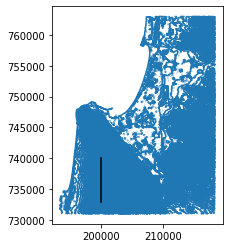

In [7]:
from shapely import geometry
import matplotlib.pyplot as plt
line = geometry.LineString([(200000, 740000), (200000, 733000)])
#example_data = topography.getDocuments(Shape=line)[0].getData()
example_data.plot()
plt.plot([200000,200000],[733000,740000], color="black")
plt.show()

Another kind of geometrical queries return all the data that intersects with the defined shape. It is defined by a parameter called ‘ShapeMode’. The line intersects with all the data types we had saved in the database. Therefore, all the data should be returned.

In [8]:
#example_intersect = topography.getDocuments(Shape=line, ShapeMode="intersects")

In addition, a saved shapely geometry name can be given as the shapely (see Shape tool documentation). For example, in the next example all the data that contains Haifa’s port is loaded.

In [9]:
#contain_port = topography.getDocuments(Shape="Haifa_Port")

### Get height

Another function of topography's datalayer helps getting the height in a coordinate.
The source of the data is defined in the config document.

In [2]:
longitude = 35.234987
latitude = 31.777978
topography.getHeight(latitude=latitude,longitude=longitude)

744

## Analysis

### Intersection with Polygons

In order to decrease the spacial boundaries of a dataframe to the boundaries of a polygon, a built in function may be used. For example, the coordinates of the Bahai gardenswere saved as a polygon in the database (see "Shapes" documentation). We will demonstrate the function's use using a dataframe defined in the previous section.

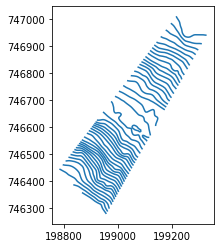

In [7]:
from hera.measurements.GIS.locations.shapes import datalayer as shapeDatalayer
from shapely import geometry
shape = shapeDatalayer(projectName="Documentation", databaseNameList=None, useAll=False,publicProjectName="Shapes")
#BahaiGardens = shape.getShape("Bahai_Gardens")
BahaiGardens = geometry.Polygon([[199220,747015],[199333,746947],[198957,746277],[198779,746438]])
newData = topography.analysis.PolygonDataFrameIntersection(example_data,BahaiGardens)
newData.plot()

### Convertion to stl

The data can be converted from a geodataframe format to an stl format using a buit in convertion function. The data can be induced as a geodataframe or as a name of a saved polygon in the database. If the data is a dataframe, the whole dataframe is converted to stl. If it is a polygon, a dataframe that contains only the requested polygon is being made and then converted to stl.

The stl string is saved by default as a file and the path to the file is added to the database. The path is by default the FilesDirectory, but other paths may be given. Any parameters and corresponding values may be given to the function too, and they are induced to the new metadata document.

A name for the new file must be given even if the file is not saved, because it is used in the stl string.

The size of cells in the dataframe used for the convention is 50X50 meters by default. It is defined in the config document, and can be changed by setting another config file.

In the next example the file is not saved. We would create an stl string for a the topography of the Bahai Gardens.

In [8]:
polygon = "Bahai_Gardens"
NewFileName = "Bahai_Gardens"

#stlstring, data = topography.analysis.toSTL(data=polygon, NewFileName=NewFileName, save=False, addToDB=False)

IndexError: list index out of range

The function returns a the stl string and a dataframe that holds the x and y coordinates and their hieghts. It also holds the max values of the x, y and z axis.